**Import the Libraries**

Melakukan Import beberapa library yang akan digunakan dalam penyusuan model

In [ ]:
# for basic mathematics operation 
import os
import statsmodels.api as sm
import pandas as pd
import numpy as np

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn import linear_model

# to inactivated warnings
import warnings 
warnings.filterwarnings('ignore')

## ** Data Preparation Exploratory Data Analysis and Pre-Processing**

Melakukan Persiapan dataset serta melakukan preprocessing terhadap data yang akan dilatih

In [ ]:
# importing the dataset
df=pd.read_csv("palingbener.csv")
df

,tanggal,stasiun,pm10,pm25,so2,co,o3,no2,max,critical,categori
0,2021-01-01,DKI1 (Bunderan HI),38.0,53.0,29.0,6.0,31.0,13.0,53,PM25,SEDANG
1,2021-01-02,DKI1 (Bunderan HI),27.0,46.0,27.0,7.0,47.0,7.0,47,O3,BAIK
2,2021-01-03,DKI1 (Bunderan HI),44.0,58.0,25.0,7.0,40.0,13.0,58,PM25,SEDANG
3,2021-01-04,DKI1 (Bunderan HI),30.0,48.0,24.0,4.0,32.0,7.0,48,PM25,BAIK
4,2021-01-05,DKI1 (Bunderan HI),38.0,53.0,24.0,6.0,31.0,9.0,53,PM25,SEDANG
...,...,...,...,...,...,...,...,...,...,...,...
753,2021-10-27,DKI5 (Kebon Jeruk) Jakarta Barat,53.0,76.0,NaN,11.0,32.0,17.0,76,PM25,SEDANG
754,2021-10-28,DKI5 (Kebon Jeruk) Jakarta Barat,51.0,77.0,NaN,16.0,29.0,27.0,77,PM25,SEDANG
755,2021-10-29,DKI5 (Kebon Jeruk) Jakarta Barat,50.0,70.0,NaN,18.0,23.0,33.0,70,PM25,SEDANG
756,2021-10-30,DKI5 (Kebon Jeruk) Jakarta Barat,50.0,74.0,NaN,12.0,30.0,24.0,74,PM25,SEDANG


In [ ]:
# deleting tanggal, max, and critical column
df=df.drop(["tanggal","max","critical"],axis=1)

In [ ]:
# showing the dataframe
df

,stasiun,pm10,pm25,so2,co,o3,no2,categori
0,DKI1 (Bunderan HI),38.0,53.0,29.0,6.0,31.0,13.0,SEDANG
1,DKI1 (Bunderan HI),27.0,46.0,27.0,7.0,47.0,7.0,BAIK
2,DKI1 (Bunderan HI),44.0,58.0,25.0,7.0,40.0,13.0,SEDANG
3,DKI1 (Bunderan HI),30.0,48.0,24.0,4.0,32.0,7.0,BAIK
4,DKI1 (Bunderan HI),38.0,53.0,24.0,6.0,31.0,9.0,SEDANG
...,...,...,...,...,...,...,...,...
753,DKI5 (Kebon Jeruk) Jakarta Barat,53.0,76.0,NaN,11.0,32.0,17.0,SEDANG
754,DKI5 (Kebon Jeruk) Jakarta Barat,51.0,77.0,NaN,16.0,29.0,27.0,SEDANG
755,DKI5 (Kebon Jeruk) Jakarta Barat,50.0,70.0,NaN,18.0,23.0,33.0,SEDANG
756,DKI5 (Kebon Jeruk) Jakarta Barat,50.0,74.0,NaN,12.0,30.0,24.0,SEDANG


In [ ]:
# showing a concise summary of a DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758 entries, 0 to 757
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   stasiun   758 non-null    object 
 1   pm10      731 non-null    float64
 2   pm25      688 non-null    float64
 3   so2       687 non-null    float64
 4   co        757 non-null    float64
 5   o3        755 non-null    float64
 6   no2       746 non-null    float64
 7   categori  758 non-null    object 
dtypes: float64(6), object(2)
memory usage: 47.5+ KB


In [ ]:
# checking if there is any NULL data
df.isna().sum()

stasiun      0
pm10        27
pm25        70
so2         71
co           1
o3           3
no2         12
categori     0
dtype: int64

In [ ]:
#fill NA/NaN values

df[["pm25","pm10","so2","co","o3","no2"]]=df[["pm25","pm10","so2","co","o3","no2"]].fillna(df[["pm25","pm10","so2","co","o3","no2"]].mean())

In [ ]:
# checking is NA/NaN values filled already
df.isna().sum()

stasiun     0
pm10        0
pm25        0
so2         0
co          0
o3          0
no2         0
categori    0
dtype: int64

## Data Visualization

Melakukan visualisasi data dan mencari hubungan korelasi antar data menggunakan plot dan matrix

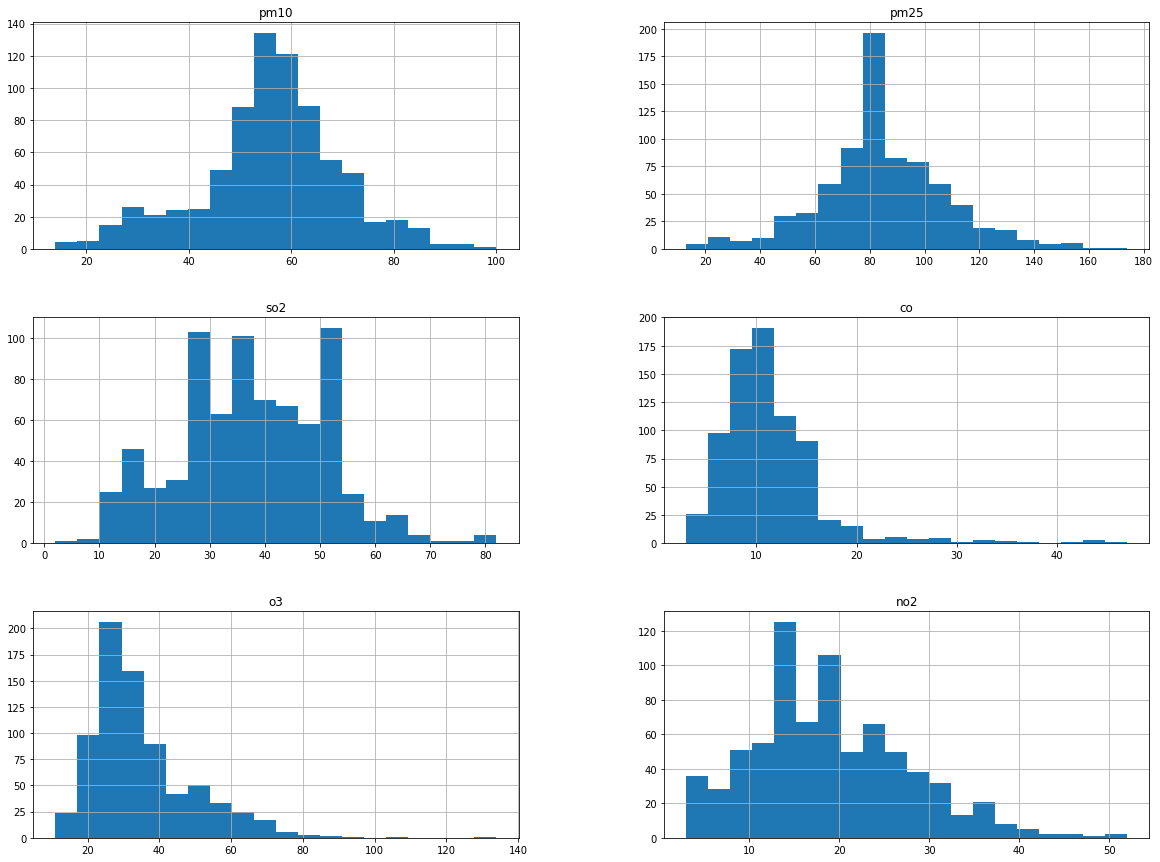

In [ ]:
# search for correlation
df.hist(bins=20, figsize=(20,15))
plt.show()

melakukan pengecekan terhadap keterkaitan antara satu variabel dengan variabel lainnya dengan menggunakan correlation matrix yang dimana semakin tinggi atau semakin terang warna pada kolom matriks maka nilai keterkaitan antar variabel juga semakin tinggi

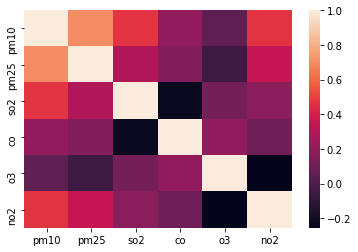

In [ ]:
# search for correlation
corr_matrix = df.corr()
sns.heatmap(corr_matrix, xticklabels=corr_matrix.columns, yticklabels=corr_matrix.columns)
plt.show()

melakukan visualisasi terhadap persentase jumlah tiap kategori pada keseluruhan dataset

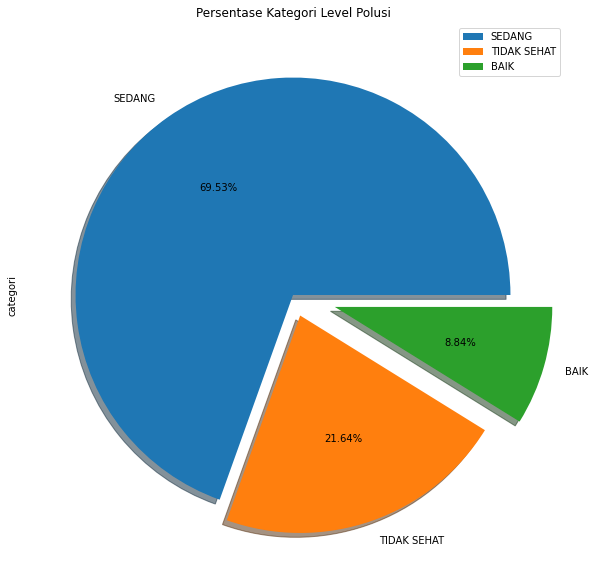

In [ ]:
# visualize the percentage of pollution level categories
plt.figure(figsize=(10,10))
df['categori'].value_counts().plot.pie(shadow=True, explode = [0,0.1, 0.2],autopct='%1.2f%%')
plt.title("Persentase Kategori Level Polusi")
plt.legend()
plt.show()

melakukan visualisasi terhadap hubungan keterkaitan antara tiap variabel dengan kategori menggunakan pairplot

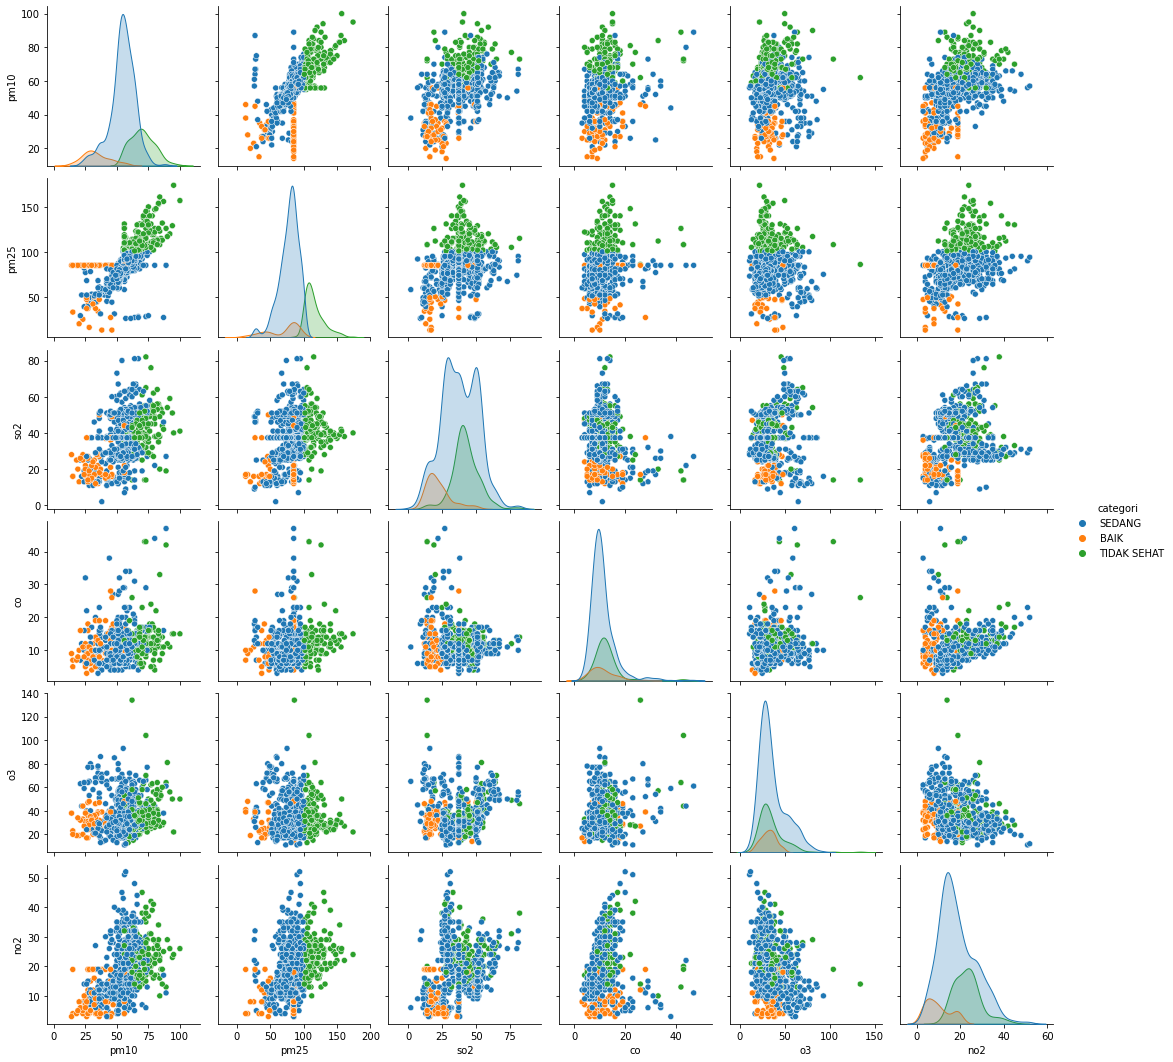

In [ ]:
# visualize pairwise relationships in a dataset
sns.pairplot(df,hue='categori')

In [ ]:
# gets rows (and/or columns) at integer locations
X=df[['pm10','pm25','so2','co','o3','no2']]
y=df['categori']
y

0      SEDANG
1        BAIK
2      SEDANG
3        BAIK
4      SEDANG
        ...  
753    SEDANG
754    SEDANG
755    SEDANG
756    SEDANG
757    SEDANG
Name: categori, Length: 758, dtype: object

**Naive Bayes Classification**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer, accuracy_score,precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import linear_model
from sklearn.linear_model import  LogisticRegression
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score
from sklearn.datasets import make_classification




# Data Splitting

Membagi dataset menjadi data training dan splitting dengan persentase 80:20 untuk training dan testing

In [ ]:
X_train, X_test, y_train, y_test  = train_test_split(X,y,test_size=0.2,random_state=101)

# Model Fitting And Evaluation

Melakukan model fitting dengan menggunakan LogisticRegression dengan maximum iterasi sebesar 400 kemudian menampilkan nilai dari confussion matrix

In [ ]:
#Model Fitting

logreg = LogisticRegression(solver= 'lbfgs',max_iter=400)
logreg.fit(X_train, y_train)
Y_pred = logreg.predict(X_test)
accuracy_lr=round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_log = round(logreg.score(X_train, y_train) * 100, 2)


cm = confusion_matrix(y_test, Y_pred)
accuracy = accuracy_score(y_test,Y_pred)
precision =precision_score(y_test, Y_pred,average='micro')
recall =  recall_score(y_test, Y_pred,average='micro')
f1 = f1_score(y_test,Y_pred,average='micro')
print('Confusion matrix for Logistic Regression\n',cm)
print('accuracy_Logistic Regression : %.3f' %accuracy)
print('precision_Logistic Regression : %.3f' %precision)
print('recall_Logistic Regression: %.3f' %recall)
print('f1-score_Logistic Regression : %.3f' %f1)



Confusion matrix for Logistic Regression
 [[  9   5   0]
 [  2 107   0]
 [  0   1  28]]
accuracy_Logistic Regression : 0.947
precision_Logistic Regression : 0.947
recall_Logistic Regression: 0.947
f1-score_Logistic Regression : 0.947


In [ ]:
# calculate the classification report
print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

        BAIK       0.82      0.64      0.72        14
      SEDANG       0.95      0.98      0.96       109
 TIDAK SEHAT       1.00      0.97      0.98        29

    accuracy                           0.95       152
   macro avg       0.92      0.86      0.89       152
weighted avg       0.95      0.95      0.95       152



# Saving Model And Testing For New Value

menyimpan model dalam format pikckle kemudian melakukan load model yang telah tersimpan untuk dilakukan testing dengan menggunakan inputan data terbaru

In [ ]:
import pickle

In [ ]:
#save the model as pickle
with open('logreg.pkl','wb') as f:
    pickle.dump(logreg,f)

In [ ]:
#load model
with open('logreg.pkl','rb') as f:
    clf_loaded=pickle.load(f)

In [ ]:
#  #checking the model
model=pickle.load(open('logreg.pkl','rb'))
print(model.predict([[27,46,27,7,47,7]]))

['BAIK']
